In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from copy import deepcopy
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import DateOffset
from pandas.api.types import is_numeric_dtype, is_string_dtype

In [118]:
cvd = pd.read_csv("data/covid.csv")
cvd2 = pd.read_csv("data/covid_data.csv")
gdp = pd.read_csv("data/gdp.csv")
att = pd.read_csv("data/attractions.csv")
acc = pd.read_csv("data/accomodations.csv")

# Covid Dataset

In [119]:
cvd

,OBJECTID,ORIGID,CountyName,PopulationCensus16,TimeStamp,IGEasting,IGNorthing,Lat,Long,UGI,ConfirmedCovidCases,PopulationProportionCovidCases,ConfirmedCovidDeaths,ConfirmedCovidRecovered,SHAPE_Length,SHAPE_Area
0,1,1,Carlow,56932,2020/02/27 00:00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,3.193486e+05,2.432352e+09
1,2,2,Cavan,76176,2020/02/27 00:00:00,246380,304501,53.9878,-7.2937,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,5.159545e+05,5.575010e+09
2,3,3,Clare,118817,2020/02/27 00:00:00,133493,182732,52.8917,-8.9889,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,1.013949e+06,8.722542e+09
3,4,4,Cork,542868,2020/02/27 00:00:00,156242,77860,51.9517,-8.6372,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,2.129949e+06,1.952949e+10
4,5,5,Donegal,159192,2020/02/27 00:00:00,202615,405691,54.8989,-7.9600,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,2.145086e+06,1.462404e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,24,Westmeath,88770,2020/03/22 00:00:00,238362,255966,53.5524,-7.4219,http://data.geohive.ie/resource/county/2ae1962...,21,23.656641,NaN,NaN,4.226693e+05,5.208706e+09
596,597,25,Wexford,149722,2020/03/22 00:00:00,301627,141559,52.5164,-6.5037,http://data.geohive.ie/resource/county/2ae1962...,7,4.675332,NaN,NaN,5.893245e+05,6.332221e+09
597,598,26,Wicklow,142425,2020/03/22 00:00:00,311162,197894,53.0205,-6.3442,http://data.geohive.ie/resource/county/2ae1962...,28,19.659470,NaN,NaN,4.275392e+05,5.580729e+09
598,599,1,Carlow,56932,2020/03/23 00:00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,3,5.269444,NaN,NaN,3.193486e+05,2.432352e+09


In [120]:
cvd2

,CountyName,TimeStamp,CovidCases
0,Carlow,2020-03-21,3
1,Carlow,2020-03-22,3
2,Carlow,2020-03-23,3
3,Carlow,2020-03-24,3
4,Carlow,2020-03-25,3
...,...,...,...
6417,Wicklow,2020-11-18,1441
6418,Wicklow,2020-11-19,1459
6419,Wicklow,2020-11-20,1466
6420,Wicklow,2020-11-21,1468


In [121]:
def GetDateOfCrossing(x, n=100):
    temp = cvd2[np.bitwise_and( cvd2["CountyName"]==x["CountyName"] , cvd2["CovidCases"]>=n ) ]
    date = None
    if(temp.size>0):
        date = temp["TimeStamp"].iloc[0]
    return date

population = cvd.groupby(by="CountyName")
population = population.aggregate(max)
population = population.reset_index()
population = population[["CountyName", "PopulationCensus16"]]
population.columns = ["CountyName", "Population"]


cvd_cleaned = cvd2.groupby(by="CountyName")
cvd_cleaned = cvd_cleaned.aggregate(max)
cvd_cleaned = cvd_cleaned.reset_index()
cvd_cleaned = cvd_cleaned[["CountyName", "CovidCases"]]
cvd_cleaned.columns = ["CountyName", "PeakCovidCases"]
cvd_cleaned["DateOfCrossing100"] = cvd_cleaned.apply(GetDateOfCrossing, axis=1)

cvd_cleaned = pd.merge(cvd_cleaned, population)[["CountyName", "Population" ,"PeakCovidCases", "DateOfCrossing100"]]
cvd_cleaned = cvd_cleaned.rename(columns={"CountyName": "cvd_CountyName"})

cvd_cleaned

,cvd_CountyName,Population,PeakCovidCases,DateOfCrossing100
0,Carlow,56932,615,2020-04-29
1,Cavan,76176,2171,2020-04-04
2,Clare,118817,1481,2020-04-12
3,Cork,542868,6274,2020-03-21
4,Donegal,159192,2783,2020-04-04
5,Dublin,1347359,26502,2020-03-21
6,Galway,258058,2595,2020-04-02
7,Kerry,147707,1308,2020-04-05
8,Kildare,222504,4044,2020-04-01
9,Kilkenny,99232,953,2020-04-09


In [122]:
pd.merge(cvd_cleaned, population)

,cvd_CountyName,Population,PeakCovidCases,DateOfCrossing100,CountyName
0,Carlow,56932,615,2020-04-29,Carlow
1,Cavan,76176,2171,2020-04-04,Cavan
2,Clare,118817,1481,2020-04-12,Clare
3,Cork,542868,6274,2020-03-21,Cork
4,Donegal,159192,2783,2020-04-04,Donegal
5,Dublin,1347359,26502,2020-03-21,Dublin
6,Galway,258058,2595,2020-04-02,Galway
7,Kerry,147707,1308,2020-04-05,Kerry
8,Kildare,222504,4044,2020-04-01,Kildare
9,Kilkenny,99232,953,2020-04-09,Kilkenny


# GDP 

In [123]:
gdp

,DATE,NAEXKP01IEQ657S
0,1997-04-01,4.015692
1,1997-07-01,2.245292
2,1997-10-01,2.465982
3,1998-01-01,1.172833
4,1998-04-01,2.370216
...,...,...
88,2019-04-01,1.910991
89,2019-07-01,3.275981
90,2019-10-01,1.318017
91,2020-01-01,-2.054418


In [124]:
BASE_YEAR = datetime.datetime(year=2000, month=1, day=1)
BASE_GDP = 100

gdp_cleaned = deepcopy(gdp)
gdp_cleaned.columns = ["TimeStamp", "Growth"]
gdp_cleaned["TimeStamp"] = gdp_cleaned["TimeStamp"].apply(lambda x: datetime.datetime(year=int(x[:4]), month=int(x[5:7]), day=int(x[8:10]), hour=0, minute=0, second=0))
gdp_cleaned = gdp_cleaned[gdp_cleaned["TimeStamp"] >= BASE_YEAR].sort_values(by='TimeStamp')

GDP = BASE_GDP
gdp_cleaned["GDP"] = None
gdp_cleaned.iloc[0,2] = GDP
for i in range(1, gdp_cleaned.shape[0]):
    previous_growth = gdp_cleaned.iloc[i,1]
    GDP = GDP * (1 + previous_growth/100.)
    gdp_cleaned.iloc[i,2] = GDP
    
gdp_cleaned["Date_to"] = gdp_cleaned["TimeStamp"]
gdp_cleaned["Date_to"] = gdp_cleaned["Date_to"] + DateOffset(months=3) - DateOffset(days=1)

gdp_cleaned = gdp_cleaned.reset_index()[["TimeStamp", "Date_to", "Growth", "GDP"]]
gdp_cleaned.columns = ["Date_from", "Date_to", "Growth", "GDP"]

In [125]:
gdp_cleaned

,Date_from,Date_to,Growth,GDP
0,2000-01-01,2000-03-31,-0.159307,100
1,2000-04-01,2000-06-30,3.039224,103.039
2,2000-07-01,2000-09-30,2.279317,105.388
3,2000-10-01,2000-12-31,0.809078,106.24
4,2001-01-01,2001-03-31,2.407606,108.798
...,...,...,...,...
77,2019-04-01,2019-06-30,1.910991,242.851
78,2019-07-01,2019-09-30,3.275981,250.806
79,2019-10-01,2019-12-31,1.318017,254.112
80,2020-01-01,2020-03-31,-2.054418,248.892


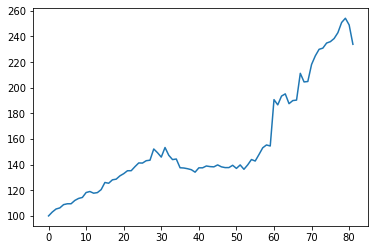

In [126]:
y = gdp_cleaned["GDP"].values
plt.plot(range(len(y)), y)

In [127]:
gdp_cleaned.size

328

In [128]:
pd.DataFrame.sort_values

<function pandas.core.frame.DataFrame.sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)>

In [129]:
att

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,"""A Rural Experience"" Day Tours",http://www.aruralexperience.com,+353(0)567727590,-7.074240,52.629797,Kilkenny,Gowran,Republic of Ireland,"Activity Operator,Tour"
1,10 Fleet Street Restaurant & Bar,http://themorgan.com/en/10-fleet-street,+353(0)16437000,-6.261232,53.345796,Dublin,Dublin City,Republic of Ireland,"Food and Drink,Restaurant,Pubs and Bar,Seafood..."
2,101 Talbot,https://www.facebook.com/pages/101-Talbot-Rest...,+353(0)18745011,-6.257199,53.350167,Dublin,Dublin City,Republic of Ireland,"Covid Safety Charter,Food and Drink,Restaurant..."
3,11 Day Discover Ireland Tour - Vagabond Tours ...,http://twitter.com/vagabondireland,+353(0)14428559,-6.260205,53.349306,Dublin,Dublin City,Republic of Ireland,"Activity Operator,Tour"
4,12 Day Giant Irish Adventure Tour - Vagabond T...,http://twitter.com/vagabondireland,+353(0)14428559,-6.260205,53.349306,Dublin,Dublin City,Republic of Ireland,"Activity Operator,Tour"
...,...,...,...,...,...,...,...,...,...
11531,The Wheelhouse Café,https://www.facebook.com/TWHCBurtonport,+353749542840,-8.427465,54.983913,Donegal,Burtonport,Republic of Ireland,"Covid Safety Charter,Food and Drink,Restaurant..."
11532,Muckish - Lúb Loch Achair,https://www.govisitdonegal.com/things-to-do/ac...,NaN,-7.909468,55.123350,Donegal,Creeslough,Republic of Ireland,"Walking,Natural Landscape"
11533,Cronin's Teach Na N'Ol,http://croninsteachnanol.com/,+3539866626,-9.809662,53.762643,Mayo,Louisburgh,Republic of Ireland,"Food and Drink,Pubs and Bar"
11534,The Manor Fields Adare,http://manorfieldsadare.com/,+353873647850,-8.791338,52.554788,Limerick,Adare,Republic of Ireland,"Climbing,Activity Operator,Gaa,Walking"


# Attractions

In [130]:
att_cleaned = att[["Name", "AddressRegion"]]
att_cleaned.columns = ["Name", "att_CountyName"]
#att_cleaned = att_cleaned.groupby(by="CountyName").aggregate("count")
att_cleaned = att_cleaned.drop_duplicates()
att_cleaned

,Name,att_CountyName
0,"""A Rural Experience"" Day Tours",Kilkenny
1,10 Fleet Street Restaurant & Bar,Dublin
2,101 Talbot,Dublin
3,11 Day Discover Ireland Tour - Vagabond Tours ...,Dublin
4,12 Day Giant Irish Adventure Tour - Vagabond T...,Dublin
...,...,...
11531,The Wheelhouse Café,Donegal
11532,Muckish - Lúb Loch Achair,Donegal
11533,Cronin's Teach Na N'Ol,Mayo
11534,The Manor Fields Adare,Limerick


In [131]:
att

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,"""A Rural Experience"" Day Tours",http://www.aruralexperience.com,+353(0)567727590,-7.074240,52.629797,Kilkenny,Gowran,Republic of Ireland,"Activity Operator,Tour"
1,10 Fleet Street Restaurant & Bar,http://themorgan.com/en/10-fleet-street,+353(0)16437000,-6.261232,53.345796,Dublin,Dublin City,Republic of Ireland,"Food and Drink,Restaurant,Pubs and Bar,Seafood..."
2,101 Talbot,https://www.facebook.com/pages/101-Talbot-Rest...,+353(0)18745011,-6.257199,53.350167,Dublin,Dublin City,Republic of Ireland,"Covid Safety Charter,Food and Drink,Restaurant..."
3,11 Day Discover Ireland Tour - Vagabond Tours ...,http://twitter.com/vagabondireland,+353(0)14428559,-6.260205,53.349306,Dublin,Dublin City,Republic of Ireland,"Activity Operator,Tour"
4,12 Day Giant Irish Adventure Tour - Vagabond T...,http://twitter.com/vagabondireland,+353(0)14428559,-6.260205,53.349306,Dublin,Dublin City,Republic of Ireland,"Activity Operator,Tour"
...,...,...,...,...,...,...,...,...,...
11531,The Wheelhouse Café,https://www.facebook.com/TWHCBurtonport,+353749542840,-8.427465,54.983913,Donegal,Burtonport,Republic of Ireland,"Covid Safety Charter,Food and Drink,Restaurant..."
11532,Muckish - Lúb Loch Achair,https://www.govisitdonegal.com/things-to-do/ac...,NaN,-7.909468,55.123350,Donegal,Creeslough,Republic of Ireland,"Walking,Natural Landscape"
11533,Cronin's Teach Na N'Ol,http://croninsteachnanol.com/,+3539866626,-9.809662,53.762643,Mayo,Louisburgh,Republic of Ireland,"Food and Drink,Pubs and Bar"
11534,The Manor Fields Adare,http://manorfieldsadare.com/,+353873647850,-8.791338,52.554788,Limerick,Adare,Republic of Ireland,"Climbing,Activity Operator,Gaa,Walking"


In [132]:
att_cleaned.shape

(7293, 2)

In [133]:
att_cleaned.drop_duplicates()

,Name,att_CountyName
0,"""A Rural Experience"" Day Tours",Kilkenny
1,10 Fleet Street Restaurant & Bar,Dublin
2,101 Talbot,Dublin
3,11 Day Discover Ireland Tour - Vagabond Tours ...,Dublin
4,12 Day Giant Irish Adventure Tour - Vagabond T...,Dublin
...,...,...
11531,The Wheelhouse Café,Donegal
11532,Muckish - Lúb Loch Achair,Donegal
11533,Cronin's Teach Na N'Ol,Mayo
11534,The Manor Fields Adare,Limerick


# Accomodations

In [134]:
acc_cleaned = acc[["Name", "AddressRegion"]] 
acc_cleaned.columns = ["Name", "acc_CountyName"]
#acc_cleaned = acc_cleaned.groupby(by="CountyName").count()
acc_cleaned

,Name,acc_CountyName
0,The #$%$#@!Royal Cork Yacht Club,Cork
1,Coláiste na Rinne,Waterford
2,The Cathedral View Apartments,Longford
3,Great Blasket Island Accommodation,Kerry
4,Newlands Lodge,Kilkenny
...,...,...
3148,Washington House B&B,Donegal
3149,Winnies Cottage,Kerry
3150,Clocan B&B,Mayo
3151,Castlemorris House,Kerry


In [135]:
len(set(acc["AddressRegion"]))

32

In [136]:
len(set(att["AddressRegion"]))

27

In [138]:
len(set(cvd_cleaned["cvd_CountyName"]))

26

In [139]:
acceptable_characters = "ABBCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz1234567890 ,.-"
for df in [cvd_cleaned, gdp_cleaned, att_cleaned, acc_cleaned]:
    for col in df.columns:
        if(is_string_dtype(df[col])):
            print(col)
            try:
                df[col] = df[col].apply(lambda x: "".join(c for c in x if c in acceptable_characters))
            except Exception as e:
                print("Error in ", col, e)

cvd_CountyName
DateOfCrossing100
GDP
Error in  GDP 'int' object is not iterable
Name
att_CountyName
Error in  att_CountyName 'float' object is not iterable
Name
acc_CountyName


<ipython-input-139-a80f16612899>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: "".join(c for c in x if c in acceptable_characters))


In [140]:
acc_cleaned

,Name,acc_CountyName
0,The Royal Cork Yacht Club,Cork
1,Coliste na Rinne,Waterford
2,The Cathedral View Apartments,Longford
3,Great Blasket Island Accommodation,Kerry
4,Newlands Lodge,Kilkenny
...,...,...
3148,Washington House BB,Donegal
3149,Winnies Cottage,Kerry
3150,Clocan BB,Mayo
3151,Castlemorris House,Kerry


In [141]:
cvd_cleaned = cvd_cleaned.reset_index()
gdp_cleaned = gdp_cleaned.reset_index()
att_cleaned = att_cleaned.reset_index()
acc_cleaned = acc_cleaned.reset_index()

cvd_cleaned["index"] = cvd_cleaned["index"] + 1
gdp_cleaned["index"] = gdp_cleaned["index"] + 1
att_cleaned["index"] = att_cleaned["index"] + 1
acc_cleaned["index"] = acc_cleaned["index"] + 1

cvd_cleaned.rename(columns={"index": "ID"}).to_csv("output/covid.csv", index=False)
gdp_cleaned.rename(columns={"index": "ID"}).to_csv("output/gdp.csv", index=False)
att_cleaned.rename(columns={"index": "ID"}).to_csv("output/attractions.csv", index=False)
acc_cleaned.rename(columns={"index": "ID"}).to_csv("output/accomodations.csv", index=False)